In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import os
import warnings
warnings.filterwarnings('ignore')

import 특이점장전ver4
import imp
imp.reload(특이점장전ver4)
from 특이점장전ver4 import Singularity

In [2]:
### 코스피 200 종목의 종목 코드
def get_filenames_in_folder(folder_path):
    return os.listdir(folder_path)

folder_path = "./KOSPI200_종목코드"
file_list = get_filenames_in_folder(folder_path)

file_list2 = []
for i in range(len(file_list)):
    file_list2.append(file_list[i].replace('.xlsx',''))

In [3]:
df = pd.read_csv('Macroeconomics_longonly.csv')

In [4]:
df_0 = df.loc[df['lables']==0]
df_1 = df.loc[df['lables']==1]
df_2 = df.loc[df['lables']==2]

In [5]:
la0_date = list(df_0['Unnamed: 0'])
la1_date = list(df_1['Unnamed: 0'])
la2_date = list(df_2['Unnamed: 0'])

In [6]:
la0_datetime = pd.to_datetime(la0_date)
la1_datetime = pd.to_datetime(la1_date)
la2_datetime = pd.to_datetime(la2_date)

In [7]:
pd.read_csv('라벨링_longonly.csv')

,Unnamed: 0,0,1,2
0,PER_사후,0.050993,0.159988,-0.069387
1,PBR_사후,0.046404,0.204231,-0.093817
2,PCR_사후,0.047917,0.169554,-0.076283
3,PSR_사후,0.060853,0.244016,-0.104831
4,배당수익률_사후,0.033862,0.111133,-0.065904
5,정상영업이익증가율_사후,0.068540,0.197513,-0.067034
6,순이익증가율_사후,0.061748,0.165531,-0.077707
7,1주당순이익_사후,0.061275,0.191340,-0.068543
8,부채비율_사후,0.043304,0.213745,-0.106189
9,매출액정상영업이익률_사후,0.032174,0.149065,-0.097053


In [8]:
# weight_0 = [1.05, 1.04, 1.04, 1.06, 1.03, 1.06, 1.06, 1.06, 1.04, 1.03, 1.07, 1.07, 1.07]
# weight_1 = [1.15, 1.20, 1.16, 1.24, 1.11, 1.19, 1.16, 1.19, 1.21, 1.14, 1.16, 1.23, 1.16]
# weight_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0]


weight_0 = [5, 4, 4, 6, 3, 6, 6, 6, 4, 3, 7, 7, 7]
weight_1 = [15, 20, 16, 24, 11, 19, 16, 19, 21, 14, 16, 23, 16]
weight_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0]

weight_3 = [1,1,1,1,1,1,1,1,1,1,1,1,1]

In [9]:
sl = Singularity(file_list2)

In [10]:
dataframes = []
for i, file in enumerate(file_list2):
    temp = pd.read_csv(f'./종목별팩터/{file}.csv', encoding='utf-8-sig')
    dataframes.append(temp)

df_close = []
for i, file in enumerate(file_list2):
    temp = pd.read_csv(f'./종목별종가/{file}.csv', encoding='utf-8-sig')
    temp.set_index('Unnamed: 0', inplace=True)
    temp.index = pd.to_datetime(temp.index)
    temp.index = pd.to_datetime(temp.index.date)
    temp['종목코드'] = file
    df_close.append(temp)

In [11]:
col_0 = ['PER', 'PBR', 'PCR', 'PSR', '배당수익률', '정상영업이익증가율',
       '순이익증가율', '1주당순이익', '부채비율', '매출액정상영업이익률', '매출액증가율', '소형주',
       '외국인 순매수 강도']
col_1 = ['PER', 'PBR', 'PCR', 'PSR', '배당수익률', '정상영업이익증가율',
       '순이익증가율', '1주당순이익', '부채비율', '매출액정상영업이익률', '매출액증가율', '소형주',
       '외국인 순매수 강도']
col_2 = ['PER', 'PBR', 'PCR', 'PSR', '배당수익률', '정상영업이익증가율',
       '순이익증가율', '1주당순이익', '부채비율', '매출액정상영업이익률', '매출액증가율', '소형주',
       '외국인 순매수 강도']

In [12]:
dataframes[0]

,Unnamed: 0,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,매출액증가율,1주당순이익,부채비율,매출액정상영업이익률,소형주,외국인 순매수 강도
0,2007-06-01,NaN,NaN,NaN,NaN,NaN,175.722421,247.503585,NaN,NaN,731.607168,19.791565,NaN,NaN
1,2007-09-01,NaN,NaN,NaN,NaN,NaN,-175.722421,-247.503585,NaN,1173.0,-110.877168,0.058435,NaN,NaN
2,2007-12-01,NaN,NaN,NaN,NaN,NaN,12.088298,42.703795,1.936209,-1173.0,NaN,0.680915,NaN,NaN
3,2008-03-01,NaN,NaN,NaN,NaN,NaN,-12.088298,-42.703795,-1.936209,3505.0,-120.557716,0.099085,NaN,NaN
4,2008-06-01,NaN,NaN,NaN,NaN,NaN,5.233005,-48.326677,-7.250125,788.0,269.447553,23.697033,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022-03-01,26.977937,2.033492,9.483968,1.036825,2.296349,-4.220855,48.964437,0.395009,1031.0,20.770549,-0.568882,0.080748,0.119356
60,2022-06-01,28.854237,2.095763,10.026441,1.075593,2.249661,72.384806,565.288402,7.110429,NaN,253.651689,9.952824,0.080439,1.388259
61,2022-09-01,35.254839,2.162258,11.663065,1.148548,2.262097,-46.244806,-519.848402,4.789571,1104.0,-45.561689,-0.162824,0.081594,0.825119
62,2022-12-01,29.541905,1.812540,9.773333,0.962857,2.694127,-8.747787,-16.510046,1.480178,-1104.0,-0.986292,-0.393573,0.082451,0.241625


In [13]:
dfs_total_0 = sl.get_rate(la0_date, col_0, dataframes, df_close)
dfs_total_1 = sl.get_rate(la1_date, col_1, dataframes, df_close)
dfs_total_2 = sl.get_rate(la2_date, col_2, dataframes, df_close)

0번째 읽어옴
1번째 읽어옴
2번째 읽어옴
3번째 읽어옴
4번째 읽어옴
5번째 읽어옴
6번째 읽어옴
7번째 읽어옴
8번째 읽어옴
9번째 읽어옴
10번째 읽어옴
11번째 읽어옴
12번째 읽어옴
13번째 읽어옴
14번째 읽어옴
15번째 읽어옴
16번째 읽어옴
17번째 읽어옴
18번째 읽어옴
19번째 읽어옴
20번째 읽어옴
21번째 읽어옴
22번째 읽어옴
23번째 읽어옴
24번째 읽어옴
25번째 읽어옴
26번째 읽어옴
27번째 읽어옴
28번째 읽어옴
29번째 읽어옴
30번째 읽어옴
31번째 읽어옴
32번째 읽어옴
33번째 읽어옴
34번째 읽어옴
35번째 읽어옴
36번째 읽어옴
37번째 읽어옴
38번째 읽어옴
39번째 읽어옴
40번째 읽어옴
41번째 읽어옴
42번째 읽어옴
43번째 읽어옴
44번째 읽어옴
45번째 읽어옴
46번째 읽어옴
47번째 읽어옴
48번째 읽어옴
49번째 읽어옴
50번째 읽어옴
51번째 읽어옴
52번째 읽어옴
53번째 읽어옴
54번째 읽어옴
55번째 읽어옴
56번째 읽어옴
57번째 읽어옴
58번째 읽어옴
59번째 읽어옴
60번째 읽어옴
61번째 읽어옴
62번째 읽어옴
63번째 읽어옴
64번째 읽어옴
65번째 읽어옴
66번째 읽어옴
67번째 읽어옴
68번째 읽어옴
69번째 읽어옴
70번째 읽어옴
71번째 읽어옴
72번째 읽어옴
73번째 읽어옴
74번째 읽어옴
75번째 읽어옴
76번째 읽어옴
77번째 읽어옴
78번째 읽어옴
79번째 읽어옴
80번째 읽어옴
81번째 읽어옴
82번째 읽어옴
83번째 읽어옴
84번째 읽어옴
85번째 읽어옴
86번째 읽어옴
87번째 읽어옴
88번째 읽어옴
89번째 읽어옴
90번째 읽어옴
91번째 읽어옴
92번째 읽어옴
93번째 읽어옴
94번째 읽어옴
95번째 읽어옴
96번째 읽어옴
97번째 읽어옴
98번째 읽어옴
99번째 읽어옴
100번째 읽어옴
101번째 읽어옴
102번째 읽어옴
103번째 읽어옴
104번째 읽어옴
105번째 읽어옴
106번째 읽어옴
107번째 읽어옴
108번째 읽어옴
109번째 읽어옴
110번째 읽어옴


In [14]:
dfs_total_0

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,종목코드,수익률
2009-03-01,NaN,NaN,NaN,NaN,NaN,13.452932,-15.197003,971.0,-16.667851,-1.648520,9.863800,NaN,0.937576,000080,0.000000
2009-12-01,NaN,NaN,NaN,NaN,NaN,-25.266071,-23.697188,685.0,-11.663020,-0.310522,-11.056261,0.082590,0.427717,000080,-0.062426
2010-03-01,11.655962,3.800385,10.233077,2.453846,NaN,44.056071,55.027188,679.0,-27.976980,-3.999478,11.686261,0.083551,0.440098,000080,-0.110138
2010-06-01,12.796066,1.999344,9.850164,1.609508,5.460820,-27.906334,6.418835,741.0,112.868081,18.864752,-59.794328,0.084197,-0.112893,000080,-0.042373
2010-12-01,13.150635,2.054127,10.122540,1.654762,5.312857,-46.384696,-69.131407,286.0,3.546952,-2.505580,-9.172138,0.083826,-0.048911,000080,-0.101523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.000000
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.000000
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073560,-0.948588,402340,-0.145865
2022-12-01,15.346825,0.344921,13.131746,5.023016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075896,0.246683,402340,-0.119423


In [15]:
dfs_total_1

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,종목코드,수익률
2007-06-01,NaN,NaN,NaN,NaN,NaN,175.722421,247.503585,NaN,731.607168,19.791565,NaN,NaN,NaN,000080,0.0
2007-09-01,NaN,NaN,NaN,NaN,NaN,-175.722421,-247.503585,1173.0,-110.877168,0.058435,NaN,NaN,NaN,000080,0.0
2008-06-01,NaN,NaN,NaN,NaN,NaN,5.233005,-48.326677,788.0,269.447553,23.697033,-7.250125,NaN,NaN,000080,0.0
2009-06-01,NaN,NaN,NaN,NaN,NaN,-16.567627,-36.707371,615.0,174.253699,16.408318,-21.606296,NaN,NaN,000080,0.0
2009-09-01,NaN,NaN,NaN,NaN,NaN,-2.222373,5.377371,896.0,-39.213699,3.301682,20.976296,NaN,NaN,000080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.0
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.0
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.0
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.455026,402340,0.0


In [16]:
dfs_total_2

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,종목코드,수익률
2007-12-01,NaN,NaN,NaN,NaN,NaN,12.088298,42.703795,-1173.0,NaN,0.680915,1.936209,NaN,NaN,000080,0.000000
2008-03-01,NaN,NaN,NaN,NaN,NaN,-12.088298,-42.703795,3505.0,-120.557716,0.099085,-1.936209,NaN,NaN,000080,0.000000
2008-09-01,NaN,NaN,NaN,NaN,NaN,31.096995,135.866677,1413.0,-60.347553,0.412967,19.490125,NaN,NaN,000080,0.000000
2008-12-01,NaN,NaN,NaN,NaN,NaN,-44.912932,-69.632997,429.0,-14.572149,-2.761480,-12.273800,NaN,NaN,000080,0.000000
2011-09-01,31.044839,2.134194,17.153065,1.384194,4.257903,26.927773,169.290634,1576.0,-6.539203,3.348569,54.722167,0.084538,-0.211696,000080,-0.260615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.000000
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402340,0.000000
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072623,-0.605499,402340,-0.126316
2022-06-01,20.680000,0.465833,17.695000,6.769167,NaN,-951.984279,-1160.223875,NaN,31.710384,28.776749,NaN,0.074473,0.512606,402340,-0.306394


In [345]:
dfs_port_0 = sl.get_port(la0_date, col_0, weight_0, dfs_total_0)
dfs_port_1 = sl.get_port(la1_date, col_1, weight_1, dfs_total_1)
dfs_port_2 = sl.get_port(la2_date, col_2, weight_2, dfs_total_2)

0번째 읽어옴
1번째 읽어옴
2번째 읽어옴
3번째 읽어옴
4번째 읽어옴
5번째 읽어옴
6번째 읽어옴
7번째 읽어옴
8번째 읽어옴
9번째 읽어옴
10번째 읽어옴
11번째 읽어옴
12번째 읽어옴
13번째 읽어옴
14번째 읽어옴
15번째 읽어옴
16번째 읽어옴
17번째 읽어옴
18번째 읽어옴
19번째 읽어옴
20번째 읽어옴
21번째 읽어옴
22번째 읽어옴
23번째 읽어옴
0번째 읽어옴
1번째 읽어옴
2번째 읽어옴
3번째 읽어옴
4번째 읽어옴
5번째 읽어옴
6번째 읽어옴
7번째 읽어옴
8번째 읽어옴
9번째 읽어옴
10번째 읽어옴
11번째 읽어옴
12번째 읽어옴
13번째 읽어옴
14번째 읽어옴
15번째 읽어옴
16번째 읽어옴
17번째 읽어옴
0번째 읽어옴
1번째 읽어옴
2번째 읽어옴
3번째 읽어옴
4번째 읽어옴
5번째 읽어옴
6번째 읽어옴
7번째 읽어옴
8번째 읽어옴
9번째 읽어옴
10번째 읽어옴
11번째 읽어옴
12번째 읽어옴
13번째 읽어옴
14번째 읽어옴
15번째 읽어옴
16번째 읽어옴
17번째 읽어옴
18번째 읽어옴
19번째 읽어옴
20번째 읽어옴
21번째 읽어옴


In [317]:
dfs_port_3 = sl.get_port(la2_date, col_2, weight_3, dfs_total_2)

0번째 읽어옴
1번째 읽어옴
2번째 읽어옴
3번째 읽어옴
4번째 읽어옴
5번째 읽어옴
6번째 읽어옴
7번째 읽어옴
8번째 읽어옴
9번째 읽어옴
10번째 읽어옴
11번째 읽어옴
12번째 읽어옴
13번째 읽어옴
14번째 읽어옴
15번째 읽어옴
16번째 읽어옴
17번째 읽어옴
18번째 읽어옴
19번째 읽어옴
20번째 읽어옴
21번째 읽어옴


In [346]:
dfs_port_0

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2009-03-01,3.704913,0.396977,1.771449,0.120097,4.986376,134.732047,391.457987,9319.304348,-30.471221,1.506250,43.454998,0.103922,0.684433,0.084578
2009-12-01,6.763333,0.556621,3.136577,0.139177,3.654139,203.245933,189.183042,12981.478261,-29.265993,5.204216,23.013385,0.098759,1.464621,0.055647
2010-03-01,7.037278,0.555403,2.944421,0.129017,3.368969,188.857355,324.482397,8140.125000,-15.951821,4.070076,21.771377,0.098492,1.110406,0.036313
2010-06-01,5.196503,0.559863,2.759743,0.157623,4.186909,250.142460,406.118414,12482.590909,26.602155,22.371730,17.204770,0.098113,1.114059,0.064910
2010-12-01,5.788420,0.605905,2.986977,0.185378,3.850930,70.942860,312.670621,12764.434783,-35.935072,7.420853,22.261805,0.096595,1.990913,0.108575
2011-03-01,6.498967,0.698788,3.289592,0.203489,3.486161,292.319212,391.215242,15293.708333,-13.074617,3.737301,29.005123,0.095676,0.645290,0.024828
2011-06-01,5.182771,0.630353,2.987860,0.245069,3.673386,164.544559,562.037865,7484.500000,32.112911,24.572700,11.110557,0.095153,0.986556,0.051485
2011-12-01,5.599907,0.619261,2.889187,0.228419,3.527698,217.653189,260.588328,5200.565217,-17.457873,2.412164,25.311973,0.096105,0.559434,0.112128
2012-03-01,4.996714,0.555159,2.597950,0.196941,4.046999,204.998535,545.850618,31632.440000,-24.127850,1.412785,40.733377,0.095383,0.708819,0.100025
2012-12-01,5.899787,0.531947,3.508075,0.185391,3.674332,207.576205,361.069932,3698.884615,-28.043375,5.305435,15.609391,0.095317,0.733555,0.041172


In [347]:
dfs_port_1

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-06-01,5.841677,0.584465,2.486994,0.175381,4.099149,500.060228,527.966154,NaN,25.994990,24.166051,34.457001,0.102370,1.065286,0.277951
2007-09-01,7.392508,0.705850,3.036408,0.220902,3.739244,297.797194,459.415240,18805.636364,-28.445045,4.163785,98.344535,0.099770,0.515359,0.173773
2008-06-01,6.604463,0.676422,2.886016,0.214683,3.952295,257.442793,491.865583,7661.347826,26.628269,23.568262,7.912576,0.099856,0.788774,0.176586
2009-06-01,4.836609,0.399587,2.316341,0.094932,4.818706,219.868686,425.576765,7001.000000,27.440086,24.235733,2.368268,0.100477,1.478488,0.194010
2009-09-01,6.412715,0.523416,3.009697,0.133230,3.858438,272.270905,493.248758,9882.304348,-53.059800,8.499852,99.707755,0.099102,1.726458,0.155012
2010-09-01,5.158994,0.555195,2.755687,0.164012,4.122995,303.908063,322.564947,13915.666667,-70.224999,3.339557,115.156896,0.097797,1.260596,0.198654
2012-09-01,5.948503,0.511368,3.465456,0.184363,3.743130,296.276599,485.957165,18225.576923,-27.246835,4.883617,65.446401,0.096268,0.766256,0.138136
2013-09-01,6.933675,0.526619,3.393116,0.150906,3.366306,306.013958,456.209950,16319.423077,-22.874251,3.570638,40.383624,0.094468,0.741433,0.130353
2014-03-01,7.404334,0.567276,3.389239,0.154379,3.422719,279.974382,347.271081,22970.615385,-31.802240,0.973176,30.659653,0.093810,0.574222,0.145370
2015-03-01,8.940945,0.530253,3.677149,0.138635,3.067174,252.920685,437.329543,21717.074074,-19.510863,2.579911,13.607877,0.095442,0.504033,0.212319


In [320]:
dfs_port_3

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,-0.038479
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,-0.039981
2008-09-01,7.180068,0.708754,3.062797,0.237355,3.787088,410.205165,783.986321,9919.130435,-22.039831,6.414913,105.786854,0.100276,0.561913,-0.121687
2008-12-01,6.096839,0.606311,2.616026,0.196213,3.739910,76.514520,210.536529,7490.391304,-20.127083,3.241298,21.476011,0.104261,0.692356,-0.203662
2011-09-01,5.697016,0.659262,3.119258,0.251960,3.629362,219.424177,353.637419,20459.291667,-27.179401,3.542886,78.212959,0.095189,0.555216,-0.150966
2012-06-01,6.483569,0.578158,3.786994,0.206929,3.434472,337.083314,360.932167,7206.375000,30.521814,20.051098,22.075473,0.096283,0.818229,-0.062147
2013-06-01,7.155502,0.561475,3.357862,0.176116,3.398103,291.512007,206.638953,3571.750000,33.058137,17.917754,24.475862,0.094691,0.695648,-0.044743
2014-06-01,9.672280,0.619581,3.980485,0.163188,2.932482,244.620444,247.587670,2655.500000,31.454179,18.907311,17.121393,0.093388,0.981342,0.013647
2014-12-01,9.914333,0.589355,4.028768,0.151780,2.869754,214.758614,192.885358,2071.777778,-12.755755,2.208644,15.454496,0.095326,0.649262,-0.042595
2015-09-01,8.403191,0.605052,3.639646,0.173209,2.788270,334.929223,676.837557,18318.392857,-27.603325,3.100217,39.808705,0.092964,0.524284,-0.054055


In [348]:
# dfs_port_2['수익률'] = df_2['국고채 3년 금리(%)'].values/100
dfs_port_2

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,0.0
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,0.0
2008-09-01,7.180068,0.708754,3.062797,0.237355,3.787088,410.205165,783.986321,9919.130435,-22.039831,6.414913,105.786854,0.100276,0.561913,0.0
2008-12-01,6.096839,0.606311,2.616026,0.196213,3.739910,76.514520,210.536529,7490.391304,-20.127083,3.241298,21.476011,0.104261,0.692356,0.0
2011-09-01,5.697016,0.659262,3.119258,0.251960,3.629362,219.424177,353.637419,20459.291667,-27.179401,3.542886,78.212959,0.095189,0.555216,0.0
2012-06-01,6.483569,0.578158,3.786994,0.206929,3.434472,337.083314,360.932167,7206.375000,30.521814,20.051098,22.075473,0.096283,0.818229,0.0
2013-06-01,7.155502,0.561475,3.357862,0.176116,3.398103,291.512007,206.638953,3571.750000,33.058137,17.917754,24.475862,0.094691,0.695648,0.0
2014-06-01,9.672280,0.619581,3.980485,0.163188,2.932482,244.620444,247.587670,2655.500000,31.454179,18.907311,17.121393,0.093388,0.981342,0.0
2014-12-01,9.914333,0.589355,4.028768,0.151780,2.869754,214.758614,192.885358,2071.777778,-12.755755,2.208644,15.454496,0.095326,0.649262,0.0
2015-09-01,8.403191,0.605052,3.639646,0.173209,2.788270,334.929223,676.837557,18318.392857,-27.603325,3.100217,39.808705,0.092964,0.524284,0.0


In [349]:
dfs_port = pd.concat([dfs_port_0, dfs_port_1, dfs_port_2], axis=0)
dfs_port.sort_index(inplace=True)

In [350]:
dfs_port

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-06-01,5.841677,0.584465,2.486994,0.175381,4.099149,500.060228,527.966154,NaN,25.994990,24.166051,34.457001,0.102370,1.065286,0.277951
2007-09-01,7.392508,0.705850,3.036408,0.220902,3.739244,297.797194,459.415240,18805.636364,-28.445045,4.163785,98.344535,0.099770,0.515359,0.173773
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,0.000000
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,0.000000
2008-06-01,6.604463,0.676422,2.886016,0.214683,3.952295,257.442793,491.865583,7661.347826,26.628269,23.568262,7.912576,0.099856,0.788774,0.176586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,8.450431,0.526116,3.016160,0.241237,3.851263,254.440832,435.357053,30706.303030,-23.094436,4.628104,22.978863,0.086881,0.441098,-0.002921
2022-06-01,6.385563,0.464370,2.678932,0.216595,4.230302,372.831858,334.937175,5165.166667,27.796189,20.712389,27.981905,0.087107,0.791273,0.000000
2022-09-01,3.848322,0.432945,2.073363,0.200783,4.582282,332.777787,415.754353,19038.828571,-17.319174,4.492886,70.204534,0.088102,0.763529,0.000000
2022-12-01,3.395079,0.404272,1.849136,0.180726,4.739465,181.954685,173.089992,2402.382353,-13.389915,2.999500,27.789605,0.088682,0.863003,0.043006


In [351]:
dfs_port_total = dfs_port.dropna()

In [352]:
dfs_port_total

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-09-01,7.392508,0.705850,3.036408,0.220902,3.739244,297.797194,459.415240,18805.636364,-28.445045,4.163785,98.344535,0.099770,0.515359,0.173773
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,0.000000
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,0.000000
2008-06-01,6.604463,0.676422,2.886016,0.214683,3.952295,257.442793,491.865583,7661.347826,26.628269,23.568262,7.912576,0.099856,0.788774,0.176586
2008-09-01,7.180068,0.708754,3.062797,0.237355,3.787088,410.205165,783.986321,9919.130435,-22.039831,6.414913,105.786854,0.100276,0.561913,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,8.450431,0.526116,3.016160,0.241237,3.851263,254.440832,435.357053,30706.303030,-23.094436,4.628104,22.978863,0.086881,0.441098,-0.002921
2022-06-01,6.385563,0.464370,2.678932,0.216595,4.230302,372.831858,334.937175,5165.166667,27.796189,20.712389,27.981905,0.087107,0.791273,0.000000
2022-09-01,3.848322,0.432945,2.073363,0.200783,4.582282,332.777787,415.754353,19038.828571,-17.319174,4.492886,70.204534,0.088102,0.763529,0.000000
2022-12-01,3.395079,0.404272,1.849136,0.180726,4.739465,181.954685,173.089992,2402.382353,-13.389915,2.999500,27.789605,0.088682,0.863003,0.043006


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [354]:
train = dfs_port_total.iloc[:46,:]   #[data['Time'] < '2019-01-01']
test = dfs_port_total.iloc[46:,:] 

In [355]:
x_train = train.copy().drop(['수익률'], axis=1)
y_train= train['수익률']
y_train = pd.DataFrame(y_train)
x_test = test.copy().drop(['수익률'], axis=1)
y_test = test['수익률']
y_test = pd.DataFrame(y_test)

In [356]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# 테스트 데이터 스케일링
x_test_scaled = scaler.transform(x_test)

In [357]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

In [358]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
}

model = XGBRegressor()

# 그리드 서치로 최적의 모델 탐색
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_scaled, y_train)

# 최적의 모델 선택 및 학습 데이터에 대한 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)


print('rmse:', RMSE)
print('mse:', MSE)

rmse: 0.10067108398429862
mse: 0.010134667150573706


In [359]:
import quantstats as qs

In [360]:
import FinanceDataReader as fdr

df_kospi = fdr.DataReader('KS11', '2007-04-01', '2023-03-31')
df_kospi.dropna(inplace=True)
# df_kospi['Return'] = df_kospi['Close'].pct_change()

In [361]:
df_kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-02,1456.189941,1464.930054,1456.060059,1459.530029,1459.530029,303500.0
2007-04-03,1463.410034,1464.479980,1452.560059,1463.750000,1463.750000,340700.0
2007-04-04,1474.650024,1484.859985,1471.050049,1483.410034,1483.410034,354000.0
2007-04-05,1485.530029,1485.770020,1478.449951,1482.040039,1482.040039,328400.0
2007-04-06,1487.729980,1488.579956,1477.689941,1484.150024,1484.150024,313700.0
...,...,...,...,...,...,...
2023-03-24,2421.270020,2423.760010,2399.489990,2414.959961,2414.959961,470100.0
2023-03-27,2423.939941,2423.939941,2395.969971,2409.219971,2409.219971,472200.0
2023-03-28,2418.689941,2434.939941,2415.340088,2434.939941,2434.939941,523500.0


In [362]:
date6 = datetime.strptime('2007-09-01', '%Y-%m-%d') 
date_list6 = []
for i in range(63):
    date_list6.append(date6)
    date6 = date6+relativedelta(months=3)

In [363]:
kospi_val = []
for date in date_list6:
    temp = df_kospi[((df_kospi.index.month == date.month)|(df_kospi.index.month == date.month-1)|
                 (df_kospi.index.month == date.month-2))& (df_kospi.index.year == date.year)]['Close']
    kospi_val.append((temp[-1]-temp[0])/temp[0])

In [364]:
benchmark_kospi = pd.DataFrame({'수익률':kospi_val}, index=date_list6)

In [338]:
rf_ = df[['국고채 3년 금리(%)']]/100
rf_ = rf_[1:]
rf_ = rf_.rename(columns={'국고채 3년 금리(%)': '수익률'})

In [339]:
rf_['new_index'] = date_list6
rf_.set_index('new_index', inplace=True)
rf_.index = pd.to_datetime(rf_.index)
rf_.index = pd.to_datetime(rf_.index.date)

In [365]:
dfs_port_total.index = pd.to_datetime(dfs_port_total.index)
dfs_port_total.index = pd.to_datetime(dfs_port_total.index.date)

In [366]:
dfs_port_total

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-09-01,7.392508,0.705850,3.036408,0.220902,3.739244,297.797194,459.415240,18805.636364,-28.445045,4.163785,98.344535,0.099770,0.515359,0.173773
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,0.000000
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,0.000000
2008-06-01,6.604463,0.676422,2.886016,0.214683,3.952295,257.442793,491.865583,7661.347826,26.628269,23.568262,7.912576,0.099856,0.788774,0.176586
2008-09-01,7.180068,0.708754,3.062797,0.237355,3.787088,410.205165,783.986321,9919.130435,-22.039831,6.414913,105.786854,0.100276,0.561913,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,8.450431,0.526116,3.016160,0.241237,3.851263,254.440832,435.357053,30706.303030,-23.094436,4.628104,22.978863,0.086881,0.441098,-0.002921
2022-06-01,6.385563,0.464370,2.678932,0.216595,4.230302,372.831858,334.937175,5165.166667,27.796189,20.712389,27.981905,0.087107,0.791273,0.000000
2022-09-01,3.848322,0.432945,2.073363,0.200783,4.582282,332.777787,415.754353,19038.828571,-17.319174,4.492886,70.204534,0.088102,0.763529,0.000000
2022-12-01,3.395079,0.404272,1.849136,0.180726,4.739465,181.954685,173.089992,2402.382353,-13.389915,2.999500,27.789605,0.088682,0.863003,0.043006


In [367]:
benchmark_kospi

,수익률
2007-09-01,0.098868
2007-12-01,-0.033393
2008-03-01,-0.080639
2008-06-01,-0.016055
2008-09-01,-0.131056
...,...
2022-03-01,-0.077475
2022-06-01,-0.148625
2022-09-01,-0.065034
2022-12-01,0.012230


In [368]:
qs.stats.sharpe(dfs_port_total['수익률'])

14.49526697924077

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-09-01   2007-09-01
End Period                 2023-03-01   2023-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       66.0%

Cumulative Return          42.73%       5,871.85%
CAGR﹪                     1.6%         19.97%

Sharpe                     1.71         14.5
Prob. Sharpe Ratio         80.12%       -
Smart Sharpe               1.54         13.08
Sortino                    2.62         3003.57
Smart Sortino              2.36         2710.61
Sortino/√2                 1.85         2123.84
Smart Sortino/√2           1.67         1916.69
Omega                      1502.78      1502.78

Max Drawdown               -40.66%      -0.29%
Longest DD Days            1097         185
Volatility (ann.)          141.45%      121.06%
R^2                        0.6          0.6
Information Ratio          1.06         1.06
Calmar 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-01,2022-03-01,2022-09-01,185,-0.292129,NaN


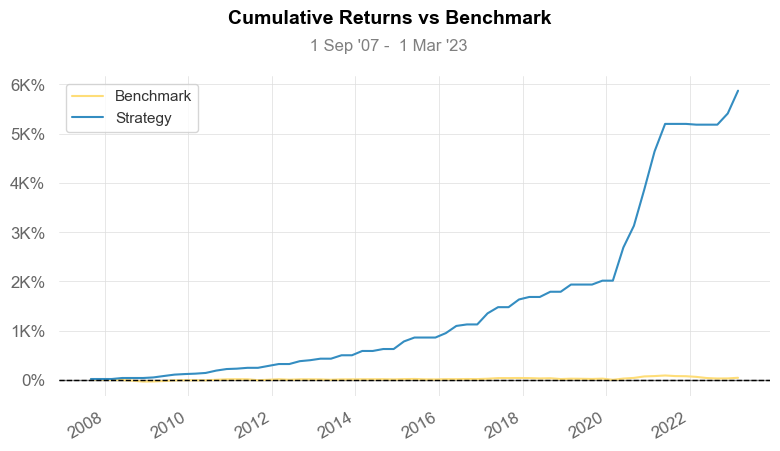

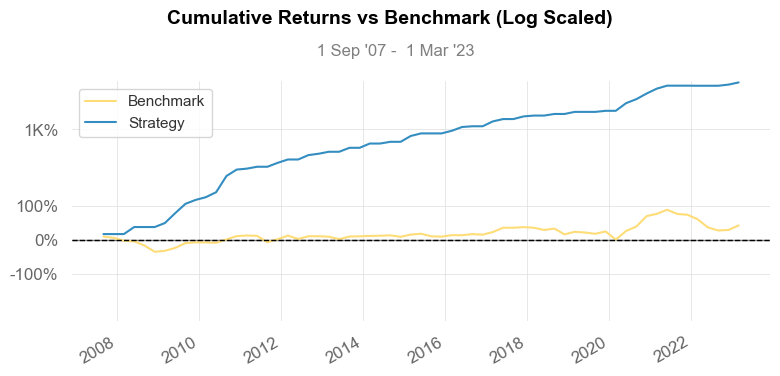

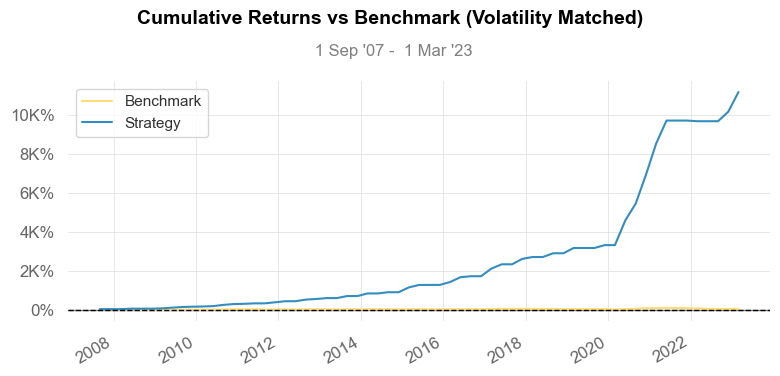

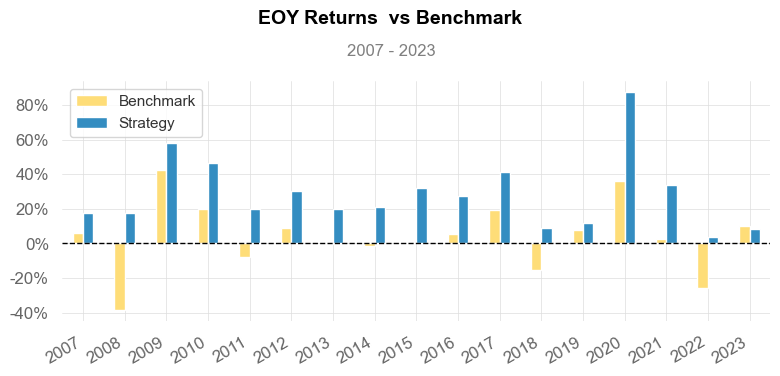

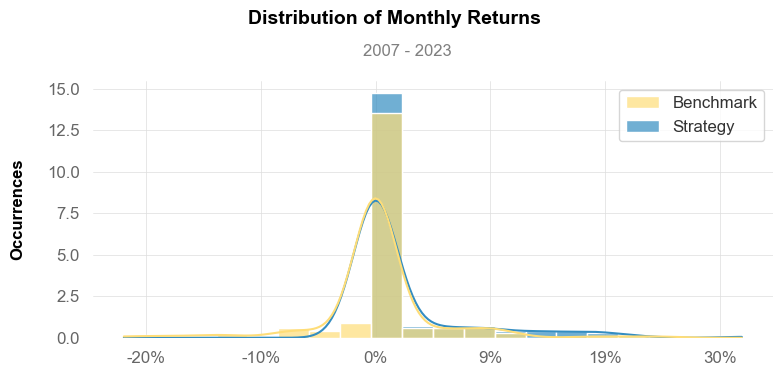

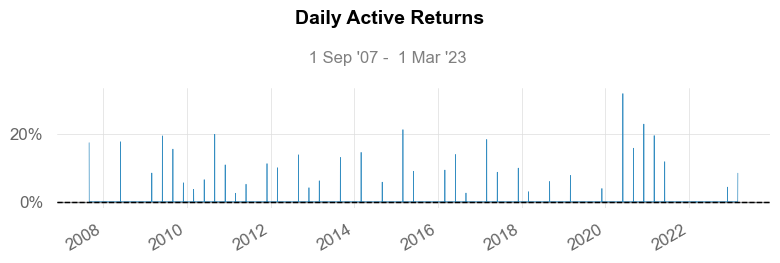

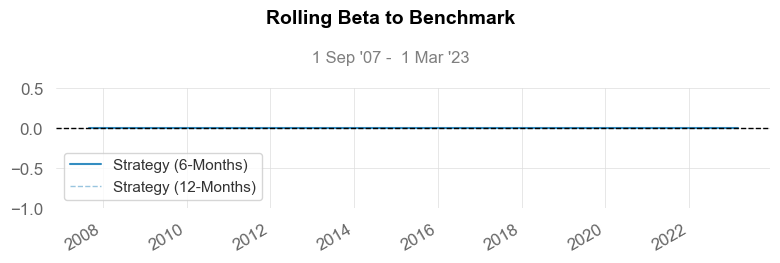

IndexError: index 0 is out of bounds for axis 0 with size 0

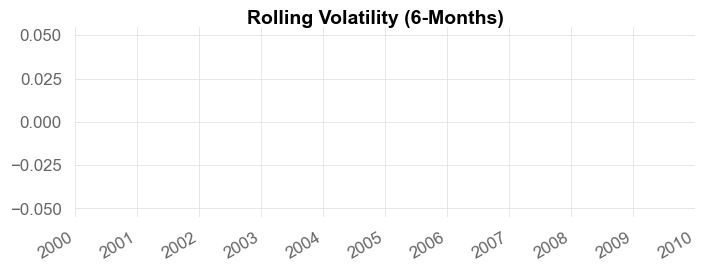

In [369]:
qs.reports.full(dfs_port_total['수익률'], benchmark_kospi)

In [224]:
dfs_port_total

,PER,PBR,PCR,PSR,배당수익률,정상영업이익증가율,순이익증가율,1주당순이익,부채비율,매출액정상영업이익률,매출액증가율,소형주,외국인 순매수 강도,수익률
2007-09-01,7.392508,0.705850,3.036408,0.220902,3.739244,297.797194,459.415240,18805.636364,-28.445045,4.163785,98.344535,0.099770,0.515359,0.204401
2007-12-01,9.198592,0.840864,3.701364,0.265121,3.523395,197.253764,204.276314,191.636364,-16.443295,2.591934,20.306348,0.099761,0.991691,0.058837
2008-03-01,8.940065,0.812045,3.685601,0.281503,3.491197,191.942660,166.464230,24699.727273,-16.342463,2.689332,13.952764,0.101193,0.484171,0.051519
2008-06-01,6.604463,0.676422,2.886016,0.214683,3.952295,257.442793,491.865583,7661.347826,26.628269,23.568262,7.912576,0.099856,0.788774,0.200152
2008-09-01,7.180068,0.708754,3.062797,0.237355,3.787088,410.205165,783.986321,9919.130435,-22.039831,6.414913,105.786854,0.100276,0.561913,0.058133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,8.450431,0.526116,3.016160,0.241237,3.851263,254.440832,435.357053,30706.303030,-23.094436,4.628104,22.978863,0.086881,0.441098,-0.001011
2022-06-01,6.385563,0.464370,2.678932,0.216595,4.230302,372.831858,334.937175,5165.166667,27.796189,20.712389,27.981905,0.087107,0.791273,0.034444
2022-09-01,3.848322,0.432945,2.073363,0.200783,4.582282,332.777787,415.754353,19038.828571,-17.319174,4.492886,70.204534,0.088102,0.763529,0.038579
2022-12-01,3.395079,0.404272,1.849136,0.180726,4.739465,181.954685,173.089992,2402.382353,-13.389915,2.999500,27.789605,0.088682,0.863003,0.043786


In [226]:
benchmark

,수익률
2007-09-01,0.098868
2007-12-01,-0.033393
2008-03-01,-0.080639
2008-06-01,-0.016055
2008-09-01,-0.131056
...,...
2022-03-01,-0.077475
2022-06-01,-0.148625
2022-09-01,-0.065034
2022-12-01,0.012230


In [180]:
df_kospi

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2007-01-02,1438.890015,1439.709961,1430.060059,1435.260010,1435.260010,147700.0,NaN
2007-01-03,1436.420044,1437.790039,1409.310059,1409.349976,1409.349976,203200.0,-0.018053
2007-01-04,1410.550049,1411.119995,1388.500000,1397.290039,1397.290039,241200.0,-0.008557
2007-01-05,1398.599976,1400.589966,1372.359985,1385.760010,1385.760010,277300.0,-0.008252
2007-01-08,1376.760010,1384.650024,1366.479980,1370.810059,1370.810059,177600.0,-0.010788
...,...,...,...,...,...,...,...
2023-05-24,2557.110107,2572.209961,2555.040039,2567.449951,2567.449951,1071600.0,-0.000039
2023-05-25,2570.639893,2575.050049,2551.489990,2554.689941,2554.689941,916700.0,-0.004970
2023-05-26,2561.939941,2567.500000,2553.790039,2558.810059,2558.810059,631800.0,0.001613


In [ ]:
qs.reports.full(top10_2019_pct['포트폴리오 일일수익률'],top10_2019_pct['kosdaq'])

In [155]:
all_predictions = best_model.predict(dfs_port_total.drop(['수익률'], axis=1))

# 백테스팅 결과를 출력합니다.
print("백테스팅 결과: ", all_predictions)

백테스팅 결과:  [0.24899398 0.24899398 0.24899398 0.1559934  0.24899398 0.24899398
 0.23804906 0.16072142 0.25007886 0.25007886 0.25007886 0.15906353
 0.25027692 0.25027692 0.24899398 0.1559934  0.24899398 0.24899398
 0.23824714 0.1559934  0.24899398 0.24899398 0.23824714 0.1559934
 0.24879591 0.25007886 0.23804906 0.1577806  0.24879591 0.24879591
 0.24879591 0.15906353 0.24899398 0.24879591 0.24879591 0.15906353
 0.25007886 0.24899398 0.23824714 0.15727633 0.24899398 0.24899398
 0.23824714 0.1559934  0.24899398 0.24899398 0.23824714 0.1559934
 0.24899398 0.24879591 0.24879591 0.1577806  0.24879591 0.24879591
 0.24879591 0.1559934  0.24899398 0.24899398 0.24899398 0.1559934
 0.24899398 0.24899398 0.24899398]
